# Assignment 2 - Machine Learning Basics

## *Jingwen Wang*
Netid:  *jw609*

Github link: *https://github.com/jacquelinewang/machine-learning-course*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**
1. Worse. Since there are not many predictors, the data is quite simple and a flexible model could result in overfitting with sample size being so large.
2. Worse. Since there are not many samples but the predictors are complicated, using flexible model could result in underfitting the data.
3. Better. Flexible model tends to perform better when dealing with non-linear relationships which is more complicated.
4. Better. The data has high variance, which means it has a complicated structure. Flexible model should, therefore, perform better than an inflexible one.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

(a) Regression; inference; n=500, p=3.

(b) Classification; prediction; n=20, p=13.

(c) Regression; prediction; n=12*4=48, p=3.



# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [8]:
# (a) Write your own kNN classifier
import numpy as np
from scipy.spatial import distance
from collections import Counter

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.x = None
        self.y = None
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x
        self.y = y
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        
        # Calculate the distance from each vector in x to the training data
        dist_matrix = distance.cdist(x, self.x, metric='euclidean')   
        neighbors_idx = np.argsort(dist_matrix, axis=1)[:, :k]
        
        # Return the estimated targets
        for i in range(neighbors_idx.shape[0]):
            neighbors_y = self.y[neighbors_idx[i].tolist()]
            y_hat.append(Counter(neighbors_y).most_common()[0][0])
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [9]:
# (b) load the dataset
import pandas as pd

x_train_low = pd.read_csv('./data/A2_X_train_low.csv', header=None).values
y_train_low = pd.read_csv('./data/A2_y_train_low.csv', header=None).values.reshape(-1)
x_test_low = pd.read_csv('./data/A2_X_test_low.csv', header=None).values
y_test_low = pd.read_csv('./data/A2_y_test_low.csv', header=None).values.reshape(-1)

x_train_high = pd.read_csv('./data/A2_X_train_high.csv', header=None).values
y_train_high = pd.read_csv('./data/A2_y_train_high.csv', header=None).values.reshape(-1)
x_test_high = pd.read_csv('./data/A2_X_test_high.csv', header=None).values
y_test_high = pd.read_csv('./data/A2_y_test_high.csv', header=None).values.reshape(-1)


In [13]:
# (c) Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset and time the predictions of each
import time

print('='*25, 'Homebrew kNN classifier', '='*25)
knn = Knn()
knn.fit(x_train_low, y_train_low)
start = time.time()
y_test_low_hat = knn.predict(x_test_low, 5)
end = time.time()
print('Test accuracy on LOW dimension dataset:', accuracy(y_test_low, y_test_low_hat), ', Time(sec):', end - start)

knn = Knn()
knn.fit(x_train_high, y_train_high)
start = time.time()
y_test_high_hat = knn.predict(x_test_high, 5)
end = time.time()
print('Test accuracy on HIGH dimension dataset:', accuracy(y_test_high, y_test_high_hat), ', Time(sec):', end - start)

========================= Homebrew kNN classifier =========================
Test accuracy on LOW dimension dataset: 0.925 , Time(sec): 0.06643414497375488
Test accuracy on HIGH dimension dataset: 0.993 , Time(sec): 0.1562643051147461


In [14]:
# (d) compare accuracy and speed with sklearn
from sklearn.neighbors import KNeighborsClassifier

print('='*25, 'sklean kNN classifier', '='*25)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_low, y_train_low)
start = time.time()
y_test_low_hat = knn.predict(x_test_low)
end = time.time()
print('Test accuracy on LOW dimension dataset:', accuracy(y_test_low, y_test_low_hat), ', Time(sec):', end - start)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_high, y_train_high)
start = time.time()
y_test_high_hat = knn.predict(x_test_high)
end = time.time()
print('Test accuracy on HIGH dimension dataset:', accuracy(y_test_high, y_test_high_hat), ', Time(sec):', end - start)

========================= sklean kNN classifier =========================
Test accuracy on LOW dimension dataset: 0.925 , Time(sec): 0.002653837203979492
Test accuracy on HIGH dimension dataset: 0.993 , Time(sec): 0.16566181182861328


The sklearn implementation is faster than the homebrewed version, especially for the low dimension dataset.

(e) drawbacks of prediction being slow

Cannot be used for tasks that require high speed. For example, high-frequency stock trading, real-time object detection, etc.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

**ANSWER**:

In [15]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

In [16]:
# (a) euclidean distance between [0,0,0] and each point
dist_matrix = distance.cdist([[0, 0, 0]], X, metric='euclidean')
pd.DataFrame(dist_matrix, columns=[i for i in range(1, 7)])

,1,2,3,4,5,6
0,3.0,2.0,3.162278,2.236068,1.414214,1.732051


In [17]:
# (b) k=1
neighbors_idx = np.argsort(dist_matrix, axis=1)[0][0]
neighbors_idx
# Return the estimated targets
y_hat = y[neighbors_idx]
print(y_hat)

b


(b) The prediction is Blue. Because the nearest neighbor is observation 5, which is Blue.

In [18]:
# (c) k=3 
neighbors_idx = np.argsort(dist_matrix, axis=1)[0][:3]

# Return the estimated targets
neighbors_y = y[neighbors_idx.tolist()]
y_hat = Counter(neighbors_y).most_common()[0][0]
print(y_hat)

r


(c) The prediction is Red. Because the top 3 nearest neighbors are observation 2(Red),5(Blue),6(Red), so the majority of these three neighbors are Red.

(d) k should be higher????

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

In [19]:
# (a) create a dataset
from sklearn.datasets import make_moons

def generate_dataset(n_samples, noise):
    X, y= make_moons(n_samples=n_samples, noise=noise)
    return X, y

X, y= generate_dataset(1000, 0.35)

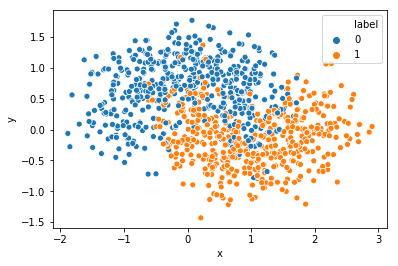

In [20]:
# (b) plot the samples
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
fig, ax = plt.subplots()
sns.scatterplot( x='x', y='y', hue='label', data=df)

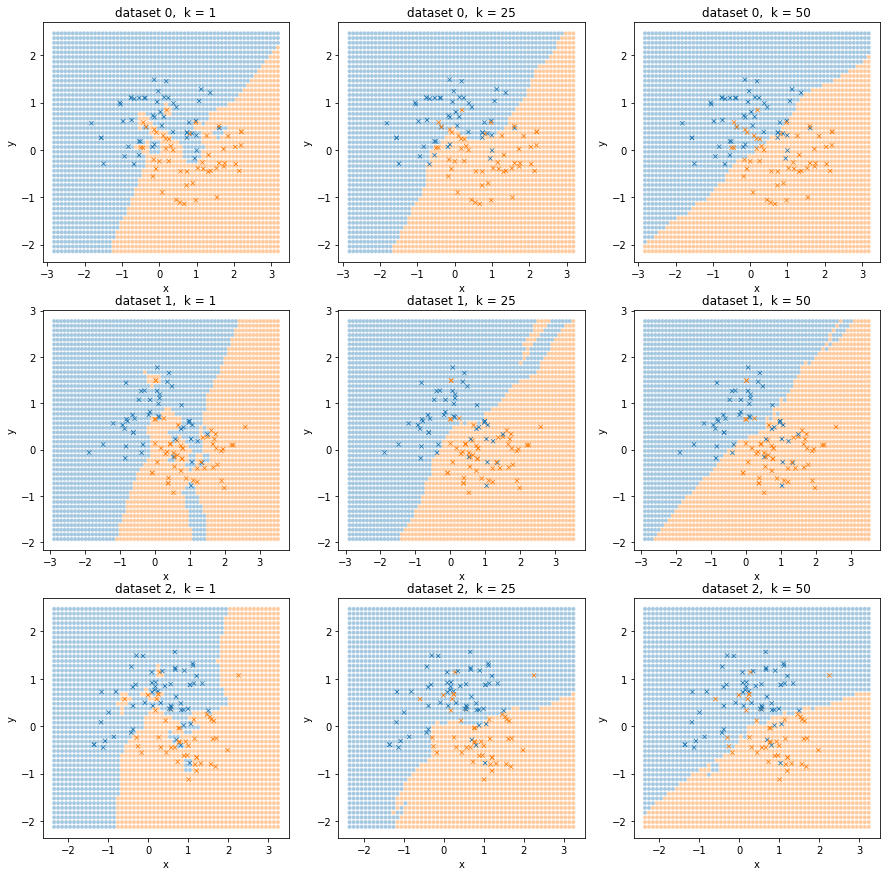

In [22]:
# (c) 3 datasets, 3 knn classifers
# (d) plot the decision boundaries

fig, ax = plt.subplots(3,3,figsize=(15,15))
h = 0.1

for i in range(3):
    idx = np.random.randint(0, len(y), size=100)
    X_sub, y_sub = X[idx], y[idx]
    df_train = pd.DataFrame(dict(x=X_sub[:, 0], y=X_sub[:, 1], label=y_sub))
    
    for j, k in enumerate([1,25,50]):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_sub, y_sub)
        
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X_sub[:, 0].min() - 1, X_sub[:, 0].max() + 1
        y_min, y_max = X_sub[:, 1].min() - 1, X_sub[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        xx = xx.ravel()
        yy = yy.ravel()
        
        Z = knn.predict(np.c_[xx, yy])

        df_bd = pd.DataFrame(dict(x=xx, y=yy, label=Z))
        
        sns.scatterplot(x='x', y='y', hue='label', data=df_bd, ax=ax[i][j], alpha=0.4, size=0.5, legend=False)
        sns.scatterplot(x='x', y='y', hue='label', data=df_train, ax=ax[i][j], marker='x',legend=False, size=2)
        ax[i][j].set_title('dataset {},  k = {}'.format(i, knn.n_neighbors))

(e) 

When k is smaller, the decision boundaies for different datasets varies. When k gets larger, the decision boundaires become similar.

The decision boundaries of k= 1 appears to best separate the two classes of data, but in the same time it vary the most as the data change.

(f) 

When k is small(k=1), the kNN classifier has a high variance as well as high bias. It will overfit the data and create a very complicated decision boundary. 

When k is large (k=50), the kNN classifier has a low variance as well as low bias. It will underfit the data and create a over-simplifed decision boundary. 

When we pick an appropriate k (k=25), the kNN classifier will have moderate variance and moderate bias. This will result in a good model that we would want to use for real classification tasks.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

In [23]:
# (a) create test set
X_train, y_train = X, y
X_test, y_test = generate_dataset(1000, 0.35)

In [24]:
# (b) 
train_accuracy = []
test_accuracy = []

for k in range(1, 501):
    if k%100 == 0:
        print('k =', k)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_train_hat = knn.predict(X_train)
    train_accuracy.append(accuracy(y_train, y_train_hat))
    y_test_hat = knn.predict(X_test)
    test_accuracy.append(accuracy(y_test, y_test_hat))
print('Done.')

k= 100
k= 200
k= 300
k= 400
k= 500


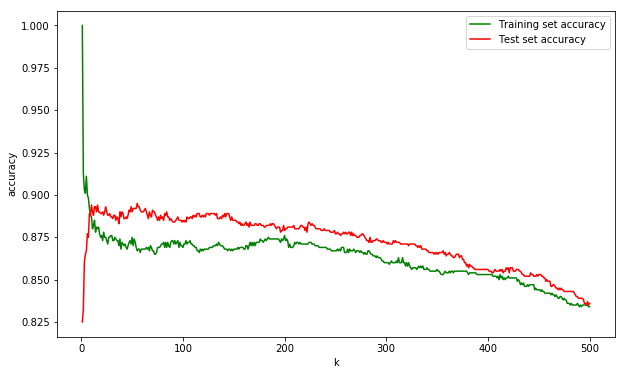

In [25]:
train = pd.DataFrame(dict(k=range(1, 501), accuracy=train_accuracy))
test = pd.DataFrame(dict(k=range(1, 501), accuracy=test_accuracy))

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x='k', y='accuracy', data=train, color='g', label='Training set accuracy')
sns.lineplot(x='k', y='accuracy', data=test, color='r', label='Test set accuracy')

(c)

The Training set accuracy decreases as k gets larger. 

The test set accuracy increases in the very beginning when k gets larger. Then it reaches a plateou, and begins to decrease after k reaches around 200.


(d)

When k < 4 ,  the model has high bias. The training set accuracy is much higher than test set accuracy.

When k > 100, the model has high variance. Both training  set accuracy and test set accuracy are low. 

why test > train???????????

(e)

k should be around 8 where training set accuracy and test set accuracy are both high and close to each other.

(f)

Linear model: number polinomial and interaction terms included.

Trees: depth of the tree

Neural Networks: the number of layers, the number of neurons in each layer.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [72]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

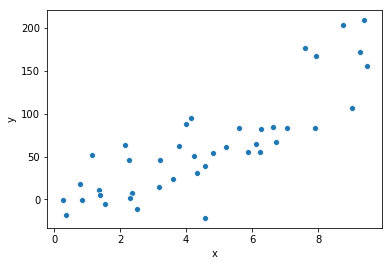

In [73]:
# (a)
df_train = pd.DataFrame(dict(x=x_train, y=y_train))
df_test = pd.DataFrame(dict(x=x_test, y=y_test))

sns.scatterplot(x='x', y='y', data=df_train)

In [108]:
# (b) linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_train=np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
                                  
reg1 = LinearRegression().fit(x_train, y_train)
y_train_hat = reg1.predict(x_train)

R2 = reg1.score(x_train, y_train)
mse = mean_squared_error(y_train, y_train_hat)
a1, a0 = reg1.coef_, reg1.intercept_
print('R2 = {}, MSE = {}'.format(R2, mse))
print('Equation: y = {} + {} * x'.format(a0, a1[0]))

R2 = 0.7014590913812251, MSE = 1052.5853662498014
Equation: y = -21.73078292905422 + 18.303206847693165 * x


In [109]:
# (c) linear regression with transformation
x_train_log = np.c_[x_train, np.log(x_train)]
reg2 = LinearRegression().fit(x_train_log, y_train)
y_train_hat = reg2.predict(x_train_log)

R2 = reg2.score(x_train_log, y_train)
mse = mean_squared_error(y_train, y_train_hat)
a1, a0 = reg2.coef_, reg2.intercept_
print('R2 = {}, MSE = {}'.format(R2, mse))
print('Equation: y = {} + {} * x + {} * log(x)'.format(a0, a1[0], a1[1]))

R2 = 0.7219455369854199, MSE = 980.3549541792602
Equation: y = -23.680150129907396 + 25.08280535865612 * x + -23.33063095557925 * log(x)


In [110]:
reg2.predict(x_input_2).shape

(100,)

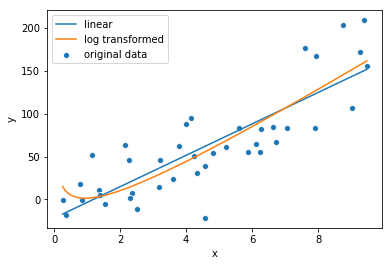

In [111]:
# (d)
x_new = np.linspace(min(x_train),max(x_train), 100)
x_input_1 = np.array(x_new).reshape(-1, 1)
x_input_2 = np.c_[x_input_1, np.log(x_input_1)]

df_train_pred1 = pd.DataFrame(dict(x=x_new, y=reg1.predict(x_input_1)))
df_train_pred2 = pd.DataFrame(dict(x=x_new, y=reg2.predict(x_input_2)))
sns.scatterplot(x='x', y='y', data=df_train, label='original data')
sns.lineplot(x='x', y='y', data=df_train_pred1, label='linear')
sns.lineplot(x='x', y='y', data=df_train_pred2, label='log transformed')

In [126]:
# (e)
x_input_1 = np.array(x_test).reshape(-1, 1)
x_input_2 = np.c_[x_input_1, np.log(x_input_1)]

y_test_hat_1 = reg1.predict(x_input_1)
y_test_hat_2 = reg2.predict(x_input_2)

def calcuate_r2_mse(reg, x, y, y_hat):
    r2 = reg.score(x, y)
    mse = mean_squared_error(y, y_hat)
    print('R2 = {}, MSE = {}'.format(r2, mse))
    
print('='*20, 'Performance on test set', '='*20)
print('linear')
calcuate_r2_mse(reg1, x_input_1, y_test, y_test_hat_1)
print('log transformed')
calcuate_r2_mse(reg2, x_input_2, y_test, y_test_hat_2)

==================== Performance on test set ====================
linear
R2 = 0.5556465885794163, MSE = 2023.3121088887128
log transformed
R2 = 0.6318499871688507, MSE = 1676.3287052696057


(f)

The second model (with log transformation) performs better on both the training data and the test data. It better since it has higer variability. Besides, as can be seen from the scatter plot, there's a log trend in the data. So it makes sense to add a log term into the model.

(g)

It's going to result in bad performance on the test set. Because the training set is non-representative of the distribution of the entire dataset as a whole.